In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from scipy import stats

In [2]:
with open("../0 save inner data/2 sorted_pigments.pkl", 'rb') as f:
    sources, dates, lon, lat, depth, pigments, use_pigments = pickle.load(f)

In [3]:
print(list(pigments))

['fuco', 'perid', 'hex_fuco', 'but_fuco', 'allo', 'tchl_b', 'zea', 'tchl_a', 'dv_chl_a']


In [4]:
variables = ["tchl_a","fuco","tchl_b","perid","allo","hex_fuco","but_fuco","dv_chl_a","zea"]
corr = np.zeros((len(variables),len(variables)))*np.nan

for i,var1 in enumerate(variables):
    for j,var2 in enumerate(variables):
        if var1==var2: continue
        use = use_pigments[var1]&use_pigments[var2]
        variable1 = pigments[var1][use]
        variable2 = pigments[var2][use]
        corr[i,j] = stats.spearmanr(variable1,variable2).correlation

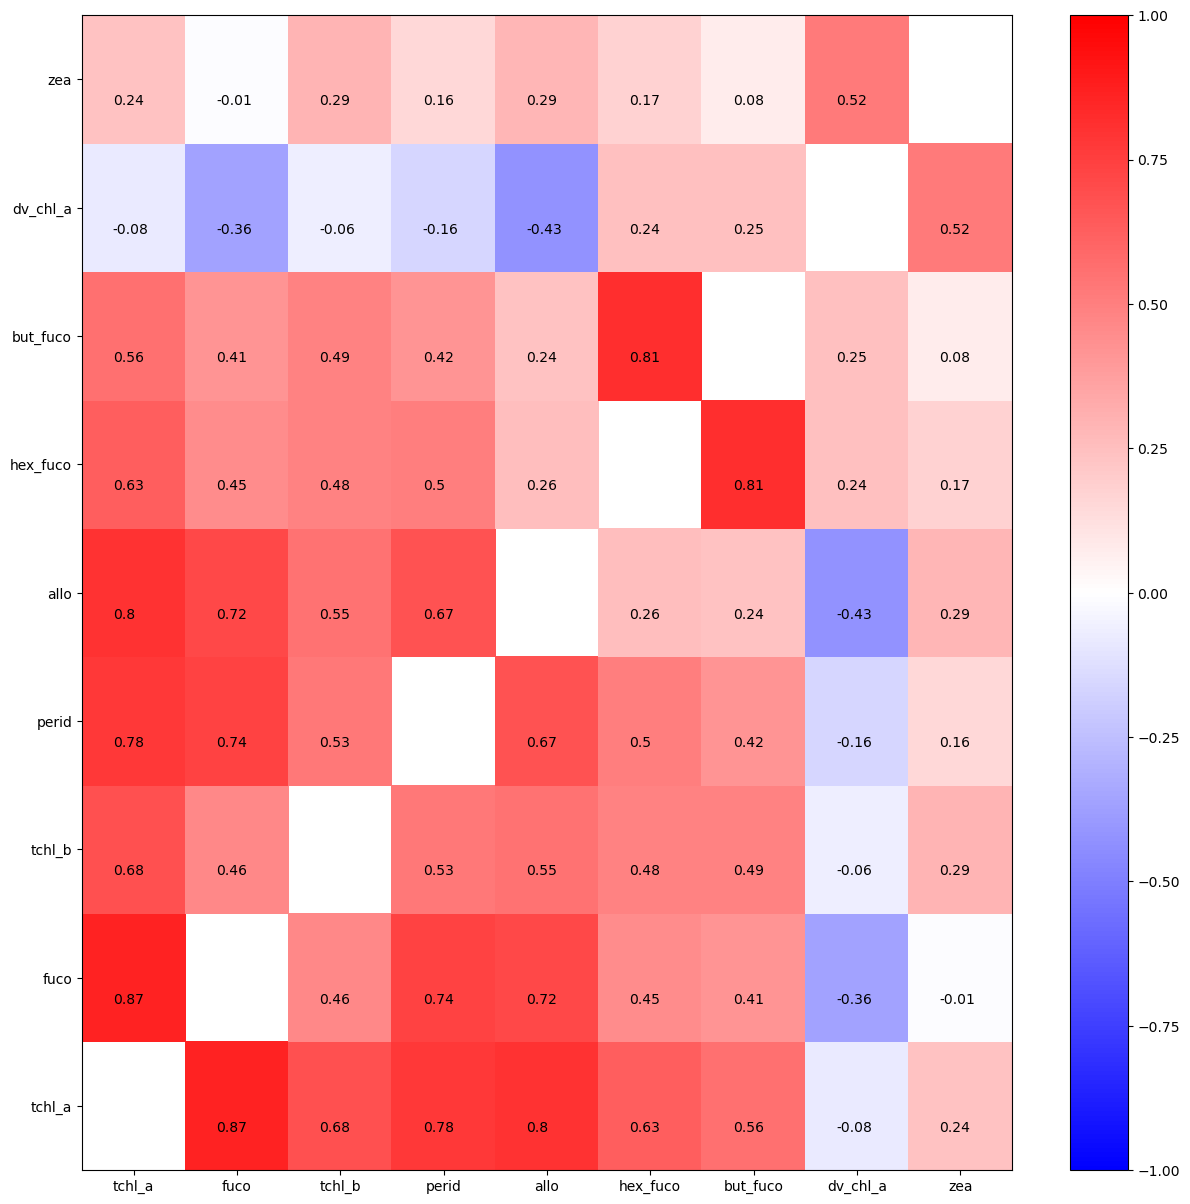

In [5]:
plt.figure(figsize=(15,15))
plt.pcolor(corr,cmap='bwr')
plt.colorbar()
plt.clim([-1,1])
a = plt.xticks(np.arange(len(variables))+0.5,list(variables))
b = plt.yticks(np.arange(len(variables))+0.5,list(variables))
for i,var1 in enumerate(variables):
    for j,var2 in enumerate(variables):
        if var1==var2: continue
        plt.text(i+0.3,j+0.3,round(corr[i,j],2))
plt.savefig("./r.tiff",dpi=400)